To execute this notebook, move it to the `src` folder

In [1]:
import pandas as pd
from utils import utils

In [2]:
# Define the target and features
TARGET = "sentiment"
FEATURES = ["text", "title"]

## Data Preparation

In [3]:
data_raw = pd.read_csv("../res/input/cryptonews.csv")
df_tweets = data_raw.copy(deep=True)

data_raw.head()

,date,sentiment,source,subject,text,title,url
0,2023-04-05 06:52:09,"{'class': 'negative', 'polarity': -0.03, 'subj...",CoinTelegraph,defi,The compensation process is expected to start ...,Allbridge to first begin repaying stuck bridge...,https://cointelegraph.com/news/allbridge-to-fi...
1,2023-04-05 06:19:00,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CryptoPotato,bitcoin,On-chain analytics revealed a sentiment shift ...,Bitcoin Hodl Patterns Indicate Cycle Shift to ...,https://cryptopotato.com/bitcoin-hodl-patterns...
2,2023-04-05 05:09:44,"{'class': 'negative', 'polarity': -0.04, 'subj...",CoinTelegraph,bitcoin,"Ether has broken the $1,900 resistance level f...",ETH hits 7-month high ahead of Shanghai and Ca...,https://cointelegraph.com/news/eth-hits-7-mont...
3,2023-04-05 01:09:52,"{'class': 'positive', 'polarity': 0.07, 'subje...",CoinTelegraph,bitcoin,"With a new quarterly production record, Marath...","Marathon Digital posts quarterly record of 2,1...",https://cointelegraph.com/news/marathon-digita...
4,2023-04-04 23:49:00,"{'class': 'positive', 'polarity': 0.4, 'subjec...",CryptoPotato,altcoin,The stablecoin BTG Dol will supposedly become ...,Brazilian Finance Giant BTG Pactual to Issue a...,https://cryptopotato.com/brazilian-finance-gia...


In [4]:
df_tweets.describe()

,date,sentiment,source,subject,text,title,url
count,18543,18543,18543,18543,18543,18543,18543
unique,18304,3196,3,6,18131,18511,18543
top,2022-01-14 00:00:00,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CoinTelegraph,bitcoin,"Get your daily, bite-sized digest of cryptoass...",Is it Too Late to Buy Shiba Inu? Crypto Expert...,https://cryptonews.com/news/celo-to-be-fastest...
freq,26,4195,8675,6439,326,4,1


In [5]:
df_tweets.isnull().sum()

date         0
sentiment    0
source       0
subject      0
text         0
title        0
url          0
dtype: int64

In [6]:
# Convert sentiment column from string to dict
df_tweets["sentiment"] = df_tweets["sentiment"].apply(eval)

# Split dictionary in separate columns
df_sentiment = pd.json_normalize(df_tweets["sentiment"])
df_tweets = pd.concat([df_tweets, df_sentiment], axis=1)

# Convert date column to datetime
df_tweets['date'] = pd.to_datetime(df_tweets['date'], format='mixed', errors='coerce')

df_tweets = df_tweets.drop(columns=["sentiment", "url"])
df_tweets = df_tweets.rename(columns={"class": "sentiment"})
df_tweets.head()

,date,source,subject,text,title,sentiment,polarity,subjectivity
0,2023-04-05 06:52:09,CoinTelegraph,defi,The compensation process is expected to start ...,Allbridge to first begin repaying stuck bridge...,negative,-0.03,0.20
1,2023-04-05 06:19:00,CryptoPotato,bitcoin,On-chain analytics revealed a sentiment shift ...,Bitcoin Hodl Patterns Indicate Cycle Shift to ...,neutral,0.00,0.00
2,2023-04-05 05:09:44,CoinTelegraph,bitcoin,"Ether has broken the $1,900 resistance level f...",ETH hits 7-month high ahead of Shanghai and Ca...,negative,-0.04,0.31
3,2023-04-05 01:09:52,CoinTelegraph,bitcoin,"With a new quarterly production record, Marath...","Marathon Digital posts quarterly record of 2,1...",positive,0.07,0.23
4,2023-04-04 23:49:00,CryptoPotato,altcoin,The stablecoin BTG Dol will supposedly become ...,Brazilian Finance Giant BTG Pactual to Issue a...,positive,0.40,0.40


## Model training

### Pretrained

#### Ollama

In [7]:
ollama_model = "llama3.1:latest"

In [8]:
ollama_pipeline = utils.OllamaPipeline(
    df=df_tweets,
    features=FEATURES,
    target=TARGET,
    ollama_model=ollama_model,
    model_name=ollama_model,
)

Analyzing sentiment with Ollama: 3709it [9:36:50,  9.33s/it]

Error for index 1747: 'sentiment_analysis'
Error for index 11118: 'sentiment_analysis'
Error for index 9981: Expecting ',' delimiter: line 166 column 1 (char 1011)


,text,title
2325,DekaBank’s partnership with Metaco is not abou...,German DekaBank plans to launch tokenization p...
14293,The company appears to have abruptly terminate...,Atari claims its namesake token is now 'unlice...
6179,Web3 security's not only about money; it’s abo...,Future of Web3 security with Immunefi and Brav...
16179,The ultimate goal is to accept crypto for paym...,Swiss city of Lugano to pay taxes in crypto vi...
11257,"It adds three new coins, modifies rates for fi...","CryptoCom Removes DOGE, SHIB, and 13 Other Alt..."
...,...,...
14655,The application awaits approval from the Unite...,Applied Blockchain Inc files for $60M IPO
3315,"Crypto-related stocks, ETFs and tokens have al...","Crypto stocks surge: Coinbase up 69%, MicroStr..."
6730,"The list of bankruptcies, shutdowns, and tradi...",Another Bear Market Casuality: Crypto Staking ...
14520,The company has decided to begin accepting PoS...,No Bitcoin: Mozilla will only accept Proof of ...


2325      neutral
14293    positive
6179      neutral
16179     neutral
11257    positive
           ...   
14655    negative
3315     positive
6730      neutral
14520    negative
11899    positive
Name: sentiment, Length: 3709, dtype: object

2325      neutral
14293     neutral
6179      neutral
16179    positive
11257    negative
           ...   
14655     neutral
3315     positive
6730     negative
14520     neutral
11899    negative
Length: 3709, dtype: object

There were 163/3709 invlaid predictions. Removed them from the evaluation. New test set size: 3546
Classification Report for llama3.1:latest:
              precision    recall  f1-score   support

    positive       0.55      0.32      0.41      1583
     neutral       0.39      0.52      0.44      1248
    negative       0.28      0.38      0.33       715

    accuracy                           0.40      3546
   macro avg       0.41      0.41      0.39      3546
weighted avg       0.44      0.40      0.40      3546

Confusion Matrix for llama3.1:latest:
[[0.32154138 0.45293746 0.22552116]
 [0.21474359 0.51842949 0.26682692]
 [0.1972028  0.41818182 0.38461538]]


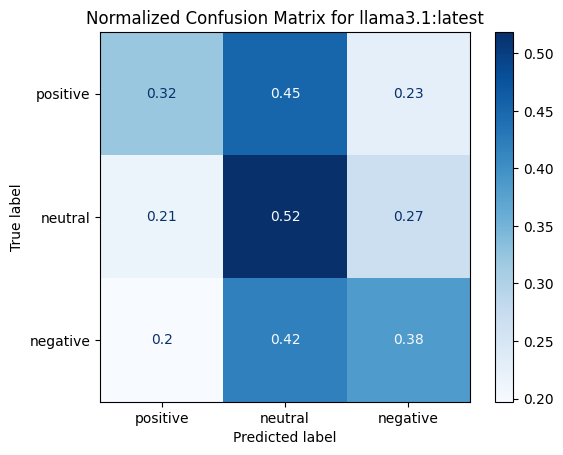

In [9]:
ollama_pipeline.evaluate()